In [12]:
import tensorflow as tf 

train_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0.1,
    horizontal_flip  = True,
    vertical_flip = True,
    rescale=1/255.0,
)

In [13]:
import os 
os.chdir("D:\ArtificialIntelligence_batch21\data")

In [14]:
input_shape_size = (128,128)

In [15]:
train_images = train_augmentation.flow_from_directory(
    os.getcwd()+"\\cat_dog_tiger",
    target_size=input_shape_size,
    color_mode = 'rgb',
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True
)

Found 28 images belonging to 3 classes.


In [16]:
from matplotlib import pyplot as plt 

train_image = None
train_label = None

for img, label in train_images:
    train_image = img 
    train_label = label
    break
train_label

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

Text(0.5, 0, '[0. 1. 0.]')

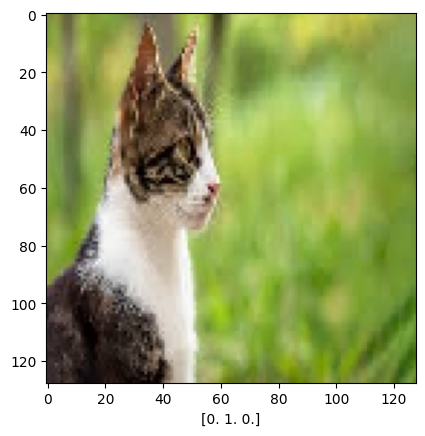

In [17]:
sample_image = train_image[2]
sample_label = train_label[0]

plt.imshow(sample_image)
plt.xlabel(sample_label)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

input_shape = (128,128,3)
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    Conv2D(32,(3,3),activation="relu"),
    
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    Conv2D(64,(3,3),activation="relu"),
    
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation="relu"),
    Dense(3,activation='softmax')
    
])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    27,558,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,625,507 (105.38 MB)

 Trainable params: 27,625,507 (105.38 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])

In [23]:
history = model.fit(train_images,epochs=20,verbose=1)

d:\anaconda3\envs\langchain\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3214 - loss: 1.0956
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3571 - loss: 5.6214
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3571 - loss: 4.5007
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3571 - loss: 1.6894
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2857 - loss: 1.1670
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3571 - loss: 1.1438
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3571 - loss: 1.0629
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3571 - loss: 1.0158
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step - accuracy: 0.4286 - loss: 0.9682
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6071 - loss: 0.9121
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4643 - loss: 0.8440
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7143 - loss: 0.8466
Epoch 13/20
1/1 ━━━━━━

In [24]:
import json 

class_names = train_images.class_indices
class_names

{'cat': 0, 'dog': 1, 'tiger': 2}

In [30]:
import cv2
import numpy as np


testing_image = "D:\ArtificialIntelligence_batch21\data\images.jpg"
testing_image = cv2.imread(testing_image)
testing_image = cv2.resize(testing_image, (128,128))
print(testing_image.shape)
pred = model.predict(np.array([testing_image]))
pred

(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


array([[2.7168547e-28, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [31]:
np.argmax(pred)

1

In [32]:
class_names

{'cat': 0, 'dog': 1, 'tiger': 2}